In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
lines = []
with open("/tmp/log.json") as f:
    for line in f:
        lines.append(json.loads(line))
    r = f.read()

In [3]:
lines[0]

{'level': 'info',
 'fmt': 'log_dir = %s',
 'args': ['/tiger/u/lando/tmp/'],
 'caller': 'slbo/utils/flags.py:156',
 'time': '2019-01-30T18:00:19.193443'}

In [21]:
real_reward_pre_warmup = []
virt_reward_pre_warmup = []

real_reward_post_warmup = []
virt_reward_post_warmup = []

real_reward_tenth_iter = []
virt_reward_tenth_iter = []

for line in lines:
    args = line["args"]
    if len(args) < 2:
        continue
    if args[0] == "post-warm-up":
        if args[1] == "Real Env":
            real_reward_post_warmup.append(args[3])
            continue
        if args[1] == "Virt Env":
            virt_reward_post_warmup.append(args[3])
            continue
        raise Exception("bad data")
    if args[0] == "episode":
        if args[1] == "Real Env":
            real_reward_pre_warmup.append(args[3])
            continue
        if args[1] == "Virt Env":
            virt_reward_pre_warmup.append(args[3])
            continue
        raise Exception("bad data")
    if args[0] == "iteration":
        if args[1] == "Real Env":
            real_reward_tenth_iter.append(args[3])
            continue
        if args[1] == "Virt Env":
            virt_reward_tenth_iter.append(args[3])
            continue
        raise Exception("bad data")

assert len(real_reward_pre_warmup) == 100
assert len(virt_reward_pre_warmup) == 100
assert len(real_reward_tenth_iter) == 100
assert len(virt_reward_tenth_iter) == 100
assert len(real_reward_post_warmup) == 99
assert len(virt_reward_post_warmup) == 99

In [27]:
print(real_reward_tenth_iter[59])

-55.10511949516526


In [25]:
print(f"Max Pre-Warmup Real Environment Reward: {max(real_reward_pre_warmup)}")
print(f"Min Pre-Warmup Real Environment Reward: {min(virt_reward_pre_warmup)}")
print(f"Pre-Warmup Real Reward at Stage 77 = {real_reward_pre_warmup[77]}")
print("")
print(f"Max Post-Warmup Real Environment Reward: {max(real_reward_post_warmup)}")
print(f"Min Post-Warmup Real Environment Reward: {min(real_reward_post_warmup)}")
print(f"Post-Warmup Real Reward at Stage 77 = {real_reward_post_warmup[76]}")

Max Pre-Warmup Real Environment Reward: -27.177174088769014
Min Pre-Warmup Real Environment Reward: -1077.8113918960357
Pre-Warmup Real Reward at Stage 77 = -342.08690359461605

Max Post-Warmup Real Environment Reward: -19.33592632355456
Min Post-Warmup Real Environment Reward: -922.6173253795739
Post-Warmup Real Reward at Stage 77 = -345.71421068334394


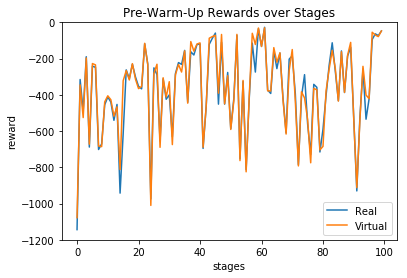

In [36]:
plt.title("Pre-Warm-Up Rewards over Stages")
plt.plot(real_reward_pre_warmup, label="Real")
plt.plot(virt_reward_pre_warmup, label="Virtual")
plt.legend()
plt.ylabel("reward")
plt.xlabel("stages")
plt.ylim(-1200, 0)
# plt.axvline(x=23, color="green")
plt.show()

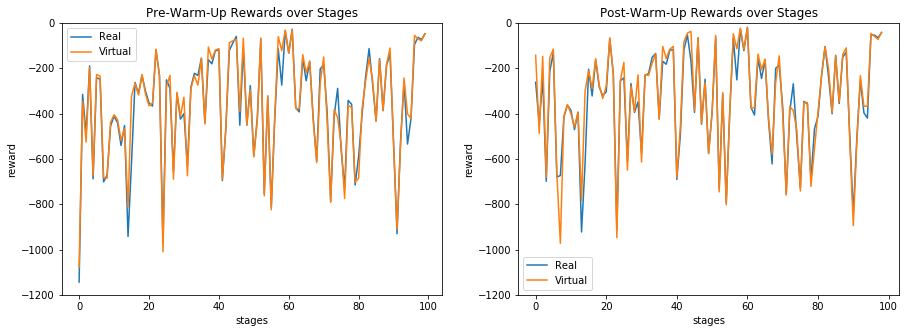

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
pre = axs[0]
pre.set_title("Pre-Warm-Up Rewards over Stages")
pre.plot(real_reward_pre_warmup, label="Real")
pre.plot(virt_reward_pre_warmup, label="Virtual")
pre.legend()
pre.set_ylabel("reward")
pre.set_xlabel("stages")
pre.set_ylim(-1200, 0)
post = axs[1]
post.set_title("Post-Warm-Up Rewards over Stages")
post.plot(real_reward_post_warmup, label="Real")
post.plot(virt_reward_post_warmup, label="Virtual")
post.legend()
post.set_ylabel("reward")
post.set_xlabel("stages")
post.set_ylim(-1200, 0)

plt.show()

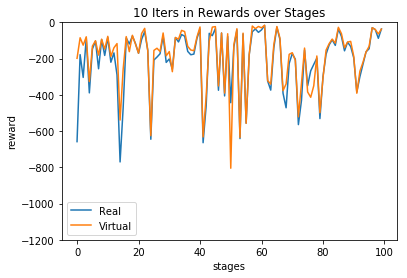

In [38]:
plt.title("10 Iters in Rewards over Stages")
plt.plot(real_reward_tenth_iter, label="Real")
plt.plot(virt_reward_tenth_iter, label="Virtual")
plt.legend()
plt.ylabel("reward")
plt.xlabel("stages")
plt.ylim(-1200, 0)
# plt.axvline(x=23, color="green")
plt.show()

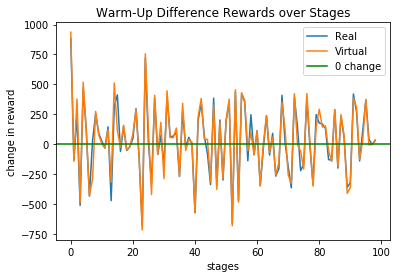

In [66]:
real_reward_warmup_difference = [x - y for (x, y) in zip(real_reward_post_warmup, real_reward_pre_warmup[0:])]
virt_reward_warmup_difference = [x - y for (x, y) in zip(virt_reward_post_warmup, virt_reward_pre_warmup[0:])]
plt.title("Warm-Up Difference Rewards over Stages")
plt.plot(real_reward_warmup_difference, label="Real")
plt.plot(virt_reward_warmup_difference, label="Virtual")
plt.ylabel("change in reward")
plt.xlabel("stages")
plt.axhline(y=0, color="green", label="0 change")
plt.legend()
plt.show()

In [9]:
goal_velocities = []
for line in lines:
    f = line["fmt"]
    if not "Task Sampled: Goal Velocity =" in f:
        continue
        
    num_text = f.lstrip("Task Sampled: Goal Velocity =")
    f = float(num_text)
    goal_velocities.append(f)

Text(0, 0.5, 'velocity sampled')

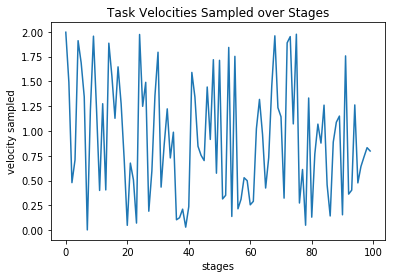

In [10]:
plt.plot(goal_velocities)
plt.title("Task Velocities Sampled over Stages")
plt.xlabel("stages")
plt.ylabel("velocity sampled")
plt.show()

Text(0.5, 1.0, 'Task Goal Velocities')

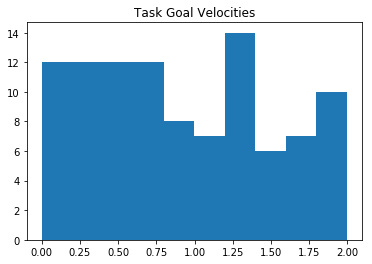

In [11]:
plt.hist(goal_velocities)
plt.title("Task Goal Velocities")
plt.show()

Text(0.5, 1.0, 'hist of change in goal velocities between tasks')

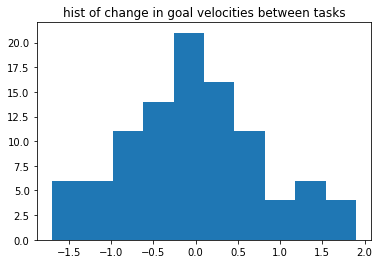

In [12]:
goal_velocity_diffs = []
for i in range(1, len(goal_velocities)):
    goal_velocity_diffs.append(goal_velocities[i] - goal_velocities[i-1])
plt.hist(goal_velocity_diffs)
plt.title("hist of change in goal velocities between tasks")
plt.show()

(-1200, 0)

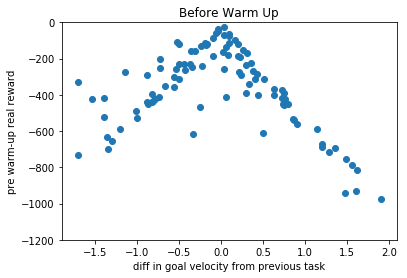

In [41]:
plt.scatter(goal_velocity_diffs, real_reward_pre_warmup[1:])
plt.ylabel("pre warm-up real reward")
plt.xlabel("diff in goal velocity from previous task")
plt.title("Before Warm Up")
plt.ylim(-1200, 0)
plt.show()

(-1200, 0)

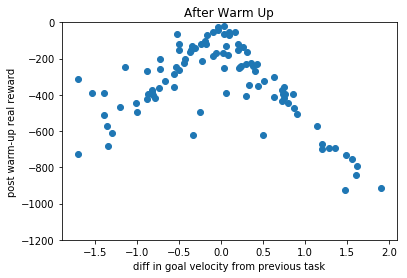

In [42]:
plt.scatter(goal_velocity_diffs, real_reward_post_warmup[0:])
plt.ylabel("post warm-up real reward")
plt.xlabel("diff in goal velocity from previous task")
plt.title("After Warm Up")
plt.ylim(-1200, 0)
plt.show()

(-1200, 0)

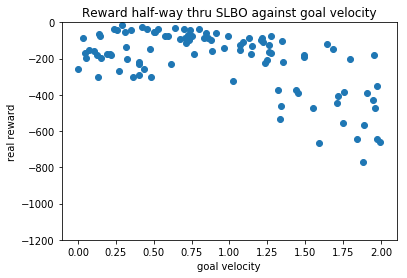

In [45]:
plt.scatter(goal_velocities, real_reward_tenth_iter)
plt.title("Reward half-way thru SLBO against goal velocity")
plt.ylabel("real reward")
plt.xlabel("goal velocity")
plt.ylim(-1200, 0)
plt.show()

Text(0.5, 0, 'goal velocity')

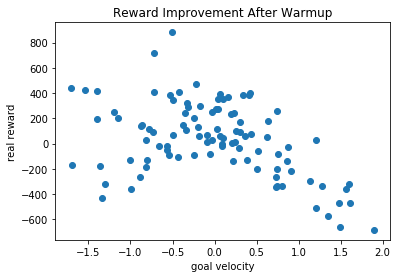

In [40]:
plt.scatter(goal_velocity_diffs, real_reward_warmup_difference)
plt.title("Reward Improvement After Warmup")
plt.ylabel("real reward")
plt.xlabel("goal velocity")
plt.ylim(-1200, 0)

Key Hyperparameters:
    - Warmup is 40 TRPO stages with 8 roll-outs each (same as inner loop of SLBO)
    
Observations:
    1. It does not appear that the post-warm-up reward improves over time.
    2. It does appear that change in goal velocity is a good predictor of subsequent reward.
    3. It does apear that high velocities are harder.
    
Next Steps:
    1. Longer warm-up (?) (it could be that the policy needs more time to adjust)
    2. Explicit reset of policy parameters (trivial in principle, in code could take a bit)